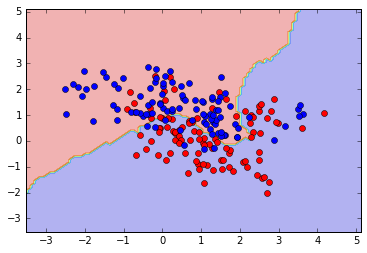

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 23:08:11 2016

@author: kamal
"""
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

x=np.load("data.npy")
X,Y,y=x[:,0],x[:,1],x[:,2]
distval=zip(X,Y)


xmin,xmax=X.min()-1,X.max()+1
ymin,ymax=Y.min()-1,Y.max()+1
h=0.09

XX,YY=np.meshgrid(np.arange(xmin,xmax,h),np.arange(xmin,xmax,h))
Z=np.c_[XX.ravel(),YY.ravel()]
KNN=15
m=XX.ravel().shape[0]
mylabels=[]
for i in range(m):
    dist=distval-Z[i]
    distsquare=dist**2
    distsum=distsquare.sum(axis=1)
    sortdist=distsum.argsort()
    collectlabels=y[sortdist[0:KNN]]
    if np.mean(collectlabels)<=0.5:
        labels=0
    elif np.mean(collectlabels)>0.5:
        labels=1   
    mylabels.append(labels)
    
finallabels=np.array(mylabels)    
finallabels=finallabels.reshape(XX.shape)


plt.contourf(XX,YY,finallabels,alpha=0.3)
uniq=np.unique(y)

color=['ro','bo']

for i in range(2):
    index=y==uniq[i]
    plt.plot(X[index],Y[index],color[i])
    
plt.show()
